In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-48ff14f5-7cdb-91fe-80d7-6891f52c2fa3)


## 1.Data

### 1.1 Preprocessing

In [ ]:
import string
import re

In [ ]:
def seperatePunct(text):
    x = re.sub( r'([a-zA-Z])([,.!?])', r'\1 \2', text)
    return x

def removeTag(text):
    x = re.sub("\\{.{1}([^}]+)\\}", '\\1', text)
    return x

def lower_text(text):
    return text.lower()

def changeTag(text):
    x = re.sub( r'\<([a-zA-Z]) ([a-zA-Z])\>', r'\1 \2', text)
    return x

def normalizeWhitespace(text):
    result = str(text)
    result = re.sub(r"//t",r"\t", result)
    result = re.sub(r"( )\1+",r"\1", result)
    result = re.sub(r"(\n)\1+",r"\1", result)
    result = re.sub(r"(\r)\1+",r"\1", result)
    result = re.sub(r"(\t)\1+",r"\1", result)

    return result.strip(" ")

### Removing punctuations. (!"#$%&'()*+, -./:;<=>?@[\]^_`{|}~)
def removePunctuations(text,exception=""):
    remove=string.punctuation+"“"+"”"+"“"+"–"
    if len(exception)!="":
        exception = list(exception)
        for i in exception:
            remove = remove.replace(i, "")
    translator = str.maketrans(remove , ' '* len(remove))
    text = text.translate(translator)

    return re.sub(' +', ' ', text)

def stringifyElement(text):
    return str(text)

def transformContraction(text):
  
    CONTRACTIONS_DICT = { 
        "ain't": "are not","'s":" is","aren't": "are not",
        "can't": "cannot","can't've": "cannot have",
        "'cause": "because","could've": "could have","couldn't": "could not",
        "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
        "don't": "do not","hadn't": "had not","hadn't've": "had not have",
        "hasn't": "has not","haven't": "have not","he'd": "he would",
        "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
        "how'd": "how did","how'd'y": "how do you","how'll": "how will",
        "I'd": "I would", "I'd've": "I would have","I'll": "I will",
        "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
        "it'd": "it would","it'd've": "it would have","it'll": "it will",
        "it'll've": "it will have", "let's": "let us","ma'am": "madam",
        "mayn't": "may not","might've": "might have","mightn't": "might not", 
        "mightn't've": "might not have","must've": "must have","mustn't": "must not",
        "mustn't've": "must not have", "needn't": "need not",
        "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
        "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
        "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
        "she'll": "she will", "she'll've": "she will have","should've": "should have",
        "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
        "that'd": "that would","that'd've": "that would have", "there'd": "there would",
        "there'd've": "there would have", "they'd": "they would",
        "they'd've": "they would have","they'll": "they will",
        "they'll've": "they will have", "they're": "they are","they've": "they have",
        "to've": "to have","wasn't": "was not","we'd": "we would",
        "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
        "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
        "what'll've": "what will have","what're": "what are", "what've": "what have",
        "when've": "when have","where'd": "where did", "where've": "where have",
        "who'll": "who will","who'll've": "who will have","who've": "who have",
        "why've": "why have","will've": "will have","won't": "will not",
        "won't've": "will not have", "would've": "would have","wouldn't": "would not",
        "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
        "y'all'd've": "you all would have","y'all're": "you all are",
        "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
        "you'll": "you will","you'll've": "you will have", "you're": "you are",
        "you've": "you have"
    }
    for key in CONTRACTIONS_DICT.keys():
        text = text.lower().replace(key, CONTRACTIONS_DICT[key])
    return text

In [ ]:
!gdown --id 1aO2_CVo6aHuJNgkA5obJlkC6o3jlkxAN

Downloading...
From: https://drive.google.com/uc?id=1aO2_CVo6aHuJNgkA5obJlkC6o3jlkxAN
To: /content/MRDA.zip
100% 1.35M/1.35M [00:00<00:00, 90.0MB/s]


In [ ]:
!unzip /content/MRDA.zip

Archive:  /content/MRDA.zip
  inflating: test.csv                
  inflating: train.csv               
  inflating: val.csv                 


In [ ]:
import pandas as pd 

# Đọc dữ liệu
train = pd.read_csv("train.csv")
valid = pd.read_csv("val.csv")
test = pd.read_csv("test.csv")

In [ ]:
list(train["Utterance_Text"].values)[:10]

['okay we are on.',
 'so i think this is going to be a pretty short meeting because i have four agenda items.',
 'three of them were requested by jane who is not going to be at the meeting today.',
 'tsk.',
 'so the uh first was transcription status.',
 'does anyone besides jane know what the transcription status is?',
 'um sort of i do peripherally.',
 'um well first of all with i b m i got a note from brian yesterday saying that they finally made the tape for the thing that we sent them a week or week and a half ago.',
 'is that english?',
 'that is our system.']

In [ ]:
train["Basic_DA_Tag"].head()

0    S
1    S
2    S
3    B
4    S
Name: Basic_DA_Tag, dtype: object

In [ ]:
# Chuyển sang dữ liệu string
train["Utterance_Text"] = train["Utterance_Text"].apply(stringifyElement)
valid["Utterance_Text"] = valid["Utterance_Text"].apply(stringifyElement)
test["Utterance_Text"]  = test["Utterance_Text"].apply(stringifyElement)

In [ ]:
# Chuyển về ký tự thường
train["Utterance_Text"] = train["Utterance_Text"].apply(lower_text)
valid["Utterance_Text"] = valid["Utterance_Text"].apply(lower_text)
test["Utterance_Text"]  = test["Utterance_Text"].apply(lower_text)

In [ ]:
# Biến đổi rút gọn cụm từ rút gọn (can't => can not)
train["Utterance_Text"] = train["Utterance_Text"].apply(transformContraction)
valid["Utterance_Text"] = valid["Utterance_Text"].apply(transformContraction)
test["Utterance_Text"] = test["Utterance_Text"].apply(transformContraction)

In [ ]:
# Xoá các ký tự đặc biệt, đấu câu chỉ giữ [.,?!]
train["Utterance_Text"] = train["Utterance_Text"].apply(seperatePunct)
valid["Utterance_Text"] = valid["Utterance_Text"].apply(seperatePunct)
test["Utterance_Text"]  = test["Utterance_Text"].apply(seperatePunct)

In [ ]:
# Chuyển hoá lại khoảng trống
train["Utterance_Text"] = train["Utterance_Text"].apply(normalizeWhitespace)
valid["Utterance_Text"] = valid["Utterance_Text"].apply(normalizeWhitespace)
test["Utterance_Text"] = test["Utterance_Text"].apply(normalizeWhitespace)

In [ ]:
#Khởi tạo tag sang id
tags = ["S", "B", "D", "F", "Q"]
from future.utils import iteritems
tag2idx = {t: i for i, t in enumerate(tags)}
idx2tag = {v: k for k, v in iteritems(tag2idx)}

In [ ]:
train["Basic_DA_Tag"] = train["Basic_DA_Tag"].apply(lambda x : tag2idx[x])
valid["Basic_DA_Tag"] = valid["Basic_DA_Tag"].apply(lambda x : tag2idx[x])
test["Basic_DA_Tag"] = test["Basic_DA_Tag"].apply(lambda x : tag2idx[x])

In [ ]:
train.head()

,num,Utterance_Text,Basic_DA_Tag,General_DA_Tag,Full_DA_Tag
0,1,okay we are on.,0,s,s
1,1,so i think this is going to be a pretty short ...,0,s,t
2,1,three of them were requested by jane who is no...,0,s,s
3,1,tsk.,1,b,b
4,1,so the uh first was transcription status.,0,h,h


In [ ]:
list(train["Utterance_Text"].values)[:10]

['okay we are on.',
 'so i think this is going to be a pretty short meeting because i have four agenda items.',
 'three of them were requested by jane who is not going to be at the meeting today.',
 'tsk.',
 'so the uh first was transcription status.',
 'does anyone besides jane know what the transcription status is?',
 'um sort of i do peripherally.',
 'um well first of all with i b m i got a note from brian yesterday saying that they finally made the tape for the thing that we sent them a week or week and a half ago.',
 'is that english?',
 'that is our system.']

### 1.2 EDA

In [ ]:
max([len(c.split()) for c in train["Utterance_Text"].values])

84

(array([0.0000e+00, 2.3992e+04, 5.5890e+03, 4.0090e+03, 3.8890e+03,
        3.5440e+03, 3.5610e+03, 3.3680e+03, 3.0840e+03, 2.7400e+03,
        2.6030e+03, 2.2390e+03, 2.0080e+03, 1.6740e+03, 1.6010e+03,
        1.4430e+03, 1.1860e+03, 1.0480e+03, 9.7200e+02, 8.7000e+02,
        7.0000e+02, 6.4600e+02, 5.3100e+02, 5.1000e+02, 4.1300e+02,
        3.6400e+02, 3.3200e+02, 2.8900e+02, 2.3400e+02, 2.0300e+02,
        1.9400e+02, 1.5200e+02, 1.3900e+02, 1.1800e+02, 1.0700e+02,
        9.0000e+01, 7.9000e+01, 6.9000e+01, 6.1000e+01, 6.3000e+01,
        3.6000e+01, 3.7000e+01, 4.0000e+01, 3.5000e+01, 1.8000e+01,
        2.2000e+01, 2.2000e+01, 1.7000e+01, 1.3000e+01, 2.3000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <a list of 50 Patch objects>

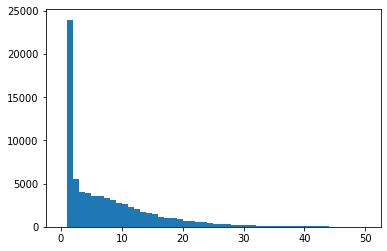

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(c.split()) for c in train["Utterance_Text"].values], bins=50, range=(0,50))

* Max từ trong câu là 84 từ
* Những câu có 0 từ, 1 từ khá nhiều

### 1.3 Data Loader

In [ ]:
import numpy as np
def split_conversation(df):
    x_data = []
    y_data = []
    for num in np.unique(df["num"]):
        indx = (df["num"] == num)
        x_data.append(list(df[indx]["Utterance_Text"].values))
        y_data.append(list(df[indx]["Basic_DA_Tag"].values))
    return x_data, y_data

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn

class DADataset(Dataset):
    
    def __init__(self, tokenizer, text, label, max_len=512):
        
        self.text = text
        self.label = label
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.text)
    
    def __getitem__(self, index):
        
        sentences = self.text[index]
        labels = self.label[index]
        
        # Tokenize all of the sentences and map the tokens to thier word IDs.
        input_ids = []
        attention_masks = []

        # For every sentence...
        for sent in sentences:
            # `encode_plus` will:
            #   (1) Tokenize the sentence.
            #   (2) Prepend the `[CLS]` token to the start.
            #   (3) Append the `[SEP]` token to the end.
            #   (4) Map tokens to their IDs.
            #   (5) Pad or truncate the sentence to `max_length`
            #   (6) Create attention masks for [PAD] tokens.
            encoded_dict = tokenizer.encode_plus(
                                sent,                      # Sentence to encode.
                                add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                max_length = 64,           # Pad & truncate all sentences.
                                pad_to_max_length = True,
                                return_attention_mask = True,   # Construct attn. masks.
                                return_tensors = 'pt',     # Return pytorch tensors.
                        )
            
            # Add the encoded sentence to the list.    
            input_ids.append(encoded_dict['input_ids'])
            
            # And its attention mask (simply differentiates padding from non-padding).
            attention_masks.append(encoded_dict['attention_mask'])

        # Convert the lists into tensors.
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        labels = torch.tensor(labels)
        
        return {
            "input_ids":input_ids,
            "attention_mask":attention_masks,
            "label":labels,
        }


In [ ]:
!pip install transformers
from transformers import BertTokenizer

In [ ]:
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [ ]:
X_train, y_train = split_conversation(train)
train_dataset = DADataset(tokenizer=tokenizer, text = X_train, label = y_train, max_len=512)
train_loader = DataLoader(dataset=train_dataset, batch_size=1, shuffle=True, drop_last=True)

In [ ]:
X_valid, y_valid = split_conversation(valid)
val_dataset = DADataset(tokenizer=tokenizer, text = X_valid, label = y_valid, max_len=512)
val_loader = DataLoader(dataset=val_dataset, batch_size=1, shuffle=False, drop_last=True)

In [ ]:
X_test, y_test = split_conversation(test)
test_dataset = DADataset(tokenizer=tokenizer, text = X_test, label = y_test, max_len=512)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, drop_last=True)

In [ ]:
len(train_loader), len(val_loader), len(test_loader)

(51, 12, 12)

* Train: 51 hộp thoại
* Val: 12 hộp thoại
* Test: 12 hộp thoại

In [ ]:
số câu x Seqlength

## 2.Modeling

In [ ]:
import torch.nn as nn
import torch
from transformers import AutoConfig, AutoModel, AutoTokenizer


class Word_RNN(nn.Module):
    
    def __init__(self, model_name="bert-base-uncased", hidden_size=768, bidirectional=True, num_layers=1):
        super(Word_RNN, self).__init__()
        
        
        # embedding layer is replaced by pretrained roberta's embedding
        self.base = AutoModel.from_pretrained(pretrained_model_name_or_path=model_name)
        
        # freeze the model parameters
        for param in self.base.parameters():
            param.requires_grad = False
        
        self.rnn = nn.LSTM(
            input_size=hidden_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            bidirectional=bidirectional,
            batch_first=True
        )
    
    def forward(self, input_ids, attention_mask):
        """
            x.shape = [batch_size, seq_len]
        """
        
        input_ids = input_ids.squeeze(0)
        attention_mask = attention_mask.squeeze(0)
        hidden_states = self.base(input_ids, attention_mask)[0] # hidden_states.shape = [batch, max_len, hidden_size]
        
        _,(outputs, _) = self.rnn(hidden_states)
                
        return outputs

In [ ]:
class Pooling_HBLSTM(nn.Module):
    
    def __init__(self, hidden_size=768, num_classes=43, device=torch.device("cuda" if torch.cuda.is_available() else "cpu")):
        
        super(Pooling_HBLSTM, self).__init__()
        
        self.in_features = 2*hidden_size
        
        self.device = device
        
        # Word_RNN encoder model
        self.word_RNN = Word_RNN("bert-base-uncased", hidden_size=hidden_size).to(device)

        # Conversation_RNN encoder model
        self.conversation_RNN = nn.LSTM(
            input_size=self.in_features, 
            hidden_size=hidden_size, 
            num_layers=1, 
            bidirectional=True,
            batch_first=True
        ).to(device)
        
        # classifier on top of feature extractor
        self.classifier = nn.Sequential(*[
            nn.Linear(in_features=self.in_features, out_features=256),
            nn.LeakyReLU(),
            nn.Linear(in_features=256, out_features=128),
            nn.LeakyReLU(),
            nn.Linear(in_features=128, out_features=num_classes)
        ]).to(device)
    
    def forward(self, inputs):
        """
            inputs.shape = [batch, seq_len, hidden_size]
        """
        
        #outputs 2 x số câu x hidden_size
        x = self.word_RNN(input_ids=inputs["input_ids"].to(device), attention_mask=inputs["attention_mask"].to(device))

        x = torch.transpose(x, 1, 0) # số câu x 2 x hidden_size
        x = x.reshape(x.shape[0], -1) # số câu x 2hidden_size

        x = x.unsqueeze(0) # 1 x số câu x 2hidden_size
        x,_ = self.conversation_RNN(x)  # 1 x số câu x 2hidden_size

        x = x.squeeze(0) #sốcâu x 2hidden_size
        
        logits = self.classifier(x)

        return logits

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = Pooling_HBLSTM(hidden_size=768, num_classes=5, device=device).to(device)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def evaluate(model, data_loader):
    accuracies = []
    losses = []
    model.eval()
    with torch.no_grad():
        for x in data_loader:
            # Forward pass
            targets = x["label"].squeeze(0).to(device)
            outputs = model(x)
            loss = losser(outputs, targets)

            accuracy = (outputs.argmax(dim=-1) == targets).type(torch.float32).mean().item()
            accuracies.append(accuracy)
            losses.append(loss.item())
    
    return np.mean(losses), np.mean(accuracies)

In [ ]:
from tqdm import tqdm

In [ ]:
scaler = torch.cuda.amp.GradScaler()
train_losses = []
train_accs = []
test_losses = []
test_accs = []

In [ ]:
# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.AdamW(params, lr=0.0001, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by 2x every 10 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=10,
                                               gamma=0.5)
losser = nn.CrossEntropyLoss().to(device)

In [ ]:
# Xem có bao nhiêu params => 133_526_789
# sum(p.numel() for p in model.parameters())

In [ ]:
n_batch = len(train_loader)
max_acc = 0

for epoch in range(2):
    model.train()
    with tqdm(train_loader, unit="batch") as tepoch:
        tepoch.set_description(f"Epoch {epoch + 1}")
        for batch_idx, x in enumerate(tepoch):

            targets = x["label"].squeeze(0).to(device)

            #forward
            with torch.cuda.amp.autocast():
                logits = model(x)
                loss = losser(logits, targets)

            # Backward
            optimizer.zero_grad()
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()


            train_accs.append((logits.argmax(dim=-1) == targets).type(torch.float32).mean().item())
            train_losses.append(loss.item())

            tepoch.set_postfix(loss=train_losses[-1], acc=train_accs[-1])

            if batch_idx >= n_batch - 1:
                val_loss, val_acc =  evaluate(model, test_loader)
                test_losses.append(val_loss)
                test_accs.append(val_acc)
                tepoch.set_postfix(loss=np.mean(train_losses), acc=np.mean(train_accs), val_loss=val_loss, val_acc=val_acc)

    if max_acc < val_acc:
        max_acc = val_acc
        print(f"Save at epoch={epoch+1} with lr={lr_scheduler.get_last_lr()} and loss={max_acc}")
        torch.save(model.state_dict(), "/content/Pooling_HBLSTM_MRDA.pth")

Epoch 1: 100%|██████████| 51/51 [04:24<00:00,  5.19s/batch, acc=0.596, loss=1.22, val_acc=0.574, val_loss=1.03]


Save at epoch=1 with lr=[0.0001] and loss=0.5737020572026571


Epoch 2: 100%|██████████| 51/51 [04:24<00:00,  5.19s/batch, acc=0.649, loss=0.999, val_acc=0.764, val_loss=0.587]


Save at epoch=2 with lr=[0.0001] and loss=0.7641851554314295


In [ ]:
evaluate(model, test_loader)

(0.5866002018253008, 0.7641851554314295)